# Import

In [4230]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from gensim.models import Word2Vec
from imblearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Data

In [4181]:
data1 = pd.read_csv('data_labeled/data_1_2024_labeled.csv')
data2 = pd.read_csv('data_labeled/data_2_2024_labeled.csv')
data3 = pd.read_csv('data_labeled/data_3_2024_labeled.csv')
data4 = pd.read_csv('data_labeled/data_4_2024_labeled.csv')

In [4182]:
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

### fixing the label

In [4183]:
data.label.value_counts()

label
Positif                                                                                                                                                                                                                                                                                                                                                                                                              5101
Negatif                                                                                                                                                                                                                                                                                                                                                                                                              3303
Netral                                                                                                                                                                        

In [4184]:
data.label = data.label.replace({
    'positif':'Positif', 
    ' positif':'Positif',
    'System: Positif' : 'Positif',
    'System: Negatif' : 'Negatif',
    'System: Netral' : 'Netral',
    'Netral.' : 'Netral',
    'Negatif.' : 'Negatif',
})

In [4185]:
data = data[data.label.isin(['Positif', 'Negatif'])] #, 'Netral'

In [4232]:
value_counts = data['label'].value_counts().reset_index()
value_counts.columns = ['label', 'count']

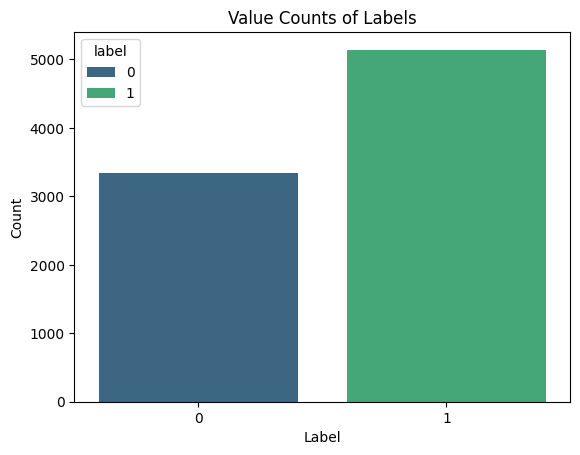

In [4236]:
sns.barplot(x='label', y='count', data=value_counts, hue='label', palette='viridis')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Counts of Labels')

plt.show()

# Preprocessing

In [4187]:
data.head()

,judul,label
0,\nMcDonald's Gugat Gerakan Boikot Produk Israe...,Negatif
2,"\nRokok Elektrik Resmi Kena Pajak, Harga Vape ...",Negatif
3,"\nCadangan Minyak RI Mau Habis, SKK Migas Buka...",Negatif
4,\nJasa Sewa Kano Laris Manis Diserbu Pelancong...,Positif
5,"\nTarif Cukai Naik Lagi, Bagaimana Harga Rokok...",Negatif


## delet \n from judul

In [4188]:
data.judul = data.judul.str.replace('\n', '')
data.judul = data.judul.str.replace('\t', '')

## Remove noise

In [4189]:
def noise_removal(words):
    words=words.translate(str.maketrans('','',string.punctuation+string.digits))
    words=words.strip()
    return words

In [4190]:
data.judul = data.judul.apply(noise_removal)

## to lowercase

In [4191]:
data.judul = data.judul.str.lower()

## Tokenisasi

In [4192]:
def tokenisasi(words):
    return word_tokenize(words)

In [4193]:
data.judul =  data.judul.apply(tokenisasi)

In [4194]:
data.head()

,judul,label
0,"[mcdonalds, gugat, gerakan, boikot, produk, is...",Negatif
2,"[rokok, elektrik, resmi, kena, pajak, harga, v...",Negatif
3,"[cadangan, minyak, ri, mau, habis, skk, migas,...",Negatif
4,"[jasa, sewa, kano, laris, manis, diserbu, pela...",Positif
5,"[tarif, cukai, naik, lagi, bagaimana, harga, r...",Negatif


## Stopword Removing

In [4195]:
# from nltk.corpus import stopwords

In [4196]:
# indo_stopword=stopwords.words('indonesian')

In [4197]:
# def stopwords_removal(words):
#     return [word for word in words if word not in indo_stopword]

In [4198]:
# data.judul =  data.judul.apply(stopwords_removal)

## Convert To Text

In [4199]:
def list_text(token):
    text=' '
    return text.join(token)

In [4200]:
data.judul =  data.judul.apply(list_text)

In [4201]:
data.head()

,judul,label
0,mcdonalds gugat gerakan boikot produk israel d...,Negatif
2,rokok elektrik resmi kena pajak harga vape cs ...,Negatif
3,cadangan minyak ri mau habis skk migas buka suara,Negatif
4,jasa sewa kano laris manis diserbu pelancong s...,Positif
5,tarif cukai naik lagi bagaimana harga rokok di...,Negatif


# WordCloud

In [4202]:
from PIL import Image

In [4203]:
text = data.judul.to_string()
# text = data.judul[data.label == 'Positif'].to_string()
# text = data.judul[data.label == 'Negatif'].to_string()
# text = data.judul[data.label == 'Netral'].to_string()

In [4204]:
mask = np.array(Image.open("mask.png"))

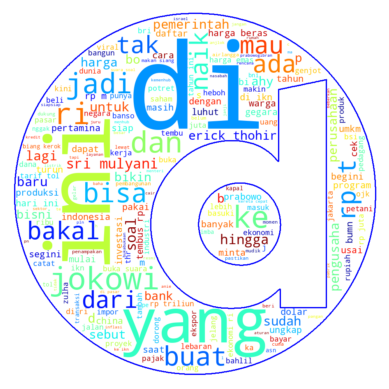

In [4205]:
wordcloud=WordCloud(background_color='white', mask=mask, width=1920,height=1080,
                    contour_width=2, contour_color='blue', colormap='jet')
wordcloud.generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Label encoding

In [4206]:
data.label.value_counts()

label
Positif    5142
Negatif    3345
Name: count, dtype: int64

In [4207]:
labelencoder = LabelEncoder()
data['label'] = labelencoder.fit_transform(data['label'])

In [4208]:
data.label.value_counts()

label
1    5142
0    3345
Name: count, dtype: int64

# Data Splitting

In [4209]:
X_train, X_test, y_train, y_test = train_test_split(data['judul'], data['label'], test_size=0.2, random_state=42)

# Feature Extraction

In [4210]:
Tfidf_vect = TfidfVectorizer(max_features=60000, ngram_range=(1, 2))
Tfidf_vect.fit(data['judul'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

In [4211]:
print(Tfidf_vect.vocabulary_)

{'mcdonalds': 29040, 'gugat': 16564, 'gerakan': 16079, 'boikot': 6942, 'produk': 38370, 'israel': 19741, 'di': 11119, 'malaysia': 28145, 'rp': 40796, 'miliar': 30459, 'mcdonalds gugat': 29041, 'gugat gerakan': 16569, 'gerakan boikot': 16080, 'boikot produk': 6947, 'produk israel': 38388, 'israel di': 19752, 'di malaysia': 11441, 'malaysia rp': 28169, 'rp miliar': 40899, 'rokok': 40739, 'elektrik': 14306, 'resmi': 40023, 'kena': 23722, 'pajak': 33258, 'harga': 16932, 'vape': 50333, 'cs': 9449, 'ikutan': 18268, 'naik': 31637, 'rokok elektrik': 40746, 'elektrik resmi': 14309, 'resmi kena': 40045, 'kena pajak': 23738, 'pajak harga': 33281, 'harga vape': 17031, 'vape cs': 50334, 'cs ikutan': 9456, 'ikutan naik': 18270, 'cadangan': 8360, 'minyak': 30723, 'ri': 40207, 'mau': 28846, 'habis': 16682, 'skk': 44040, 'migas': 30386, 'buka': 7763, 'suara': 44828, 'cadangan minyak': 8365, 'minyak ri': 30747, 'ri mau': 40343, 'mau habis': 28911, 'habis skk': 16691, 'skk migas': 44041, 'migas buka': 30

In [4212]:
len(Tfidf_vect.vocabulary_)

51656

In [4213]:
# sentences = [sentence.split() for sentence in X_train]
# w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [4214]:
# def vectorize(sentence):
#     words = sentence.split()
#     words_vecs = [w2v.wv[word] for word in words if word in w2v.wv]
#     if len(words_vecs) == 0:
#         return np.zeros(100)
#     words_vecs = np.array(words_vecs)
#     return words_vecs.mean(axis=0)

In [4215]:
# X_train = np.array([np.abs(vectorize(sentence)) for sentence in X_train])
# X_test = np.array([np.abs(vectorize(sentence)) for sentence in X_test])

# Over sample

In [4216]:
X_train, y_train = RandomOverSampler(sampling_strategy='not majority', random_state=42).fit_resample(X_train, y_train)

In [4217]:
y_train.value_counts()

label
0    4145
1    4145
Name: count, dtype: int64

# Model

In [4264]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

## Naive bayes

In [4219]:
Naive = MultinomialNB(alpha=1.5)
Naive.fit(X_train,y_train)

MultinomialNB(alpha=1.5)

In [4220]:
predictions_NB = Naive.predict(X_test)

In [4221]:
print("Naive Bayes Accuracy -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy ->  80.74204946996466


In [4222]:
print(classification_report(y_test, predictions_NB))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       701
           1       0.86      0.80      0.83       997

    accuracy                           0.81      1698
   macro avg       0.80      0.81      0.80      1698
weighted avg       0.81      0.81      0.81      1698



In [4244]:
cf_matrix = confusion_matrix(y_test, predictions_NB)

<Axes: >

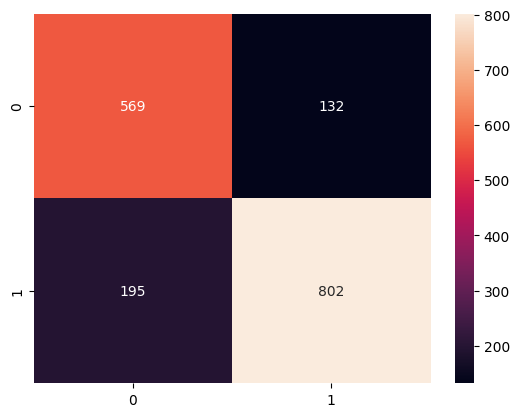

In [4248]:
sns.heatmap(cf_matrix, fmt='d', annot=True)

## SVC

In [4223]:
SVM = SVC(C=1, kernel='linear')
SVM.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [4224]:
predictions_SVM = SVM.predict(X_test)

In [4225]:
print("SVM Accuracy -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy ->  82.27326266195524


In [4226]:
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       701
           1       0.83      0.88      0.85       997

    accuracy                           0.82      1698
   macro avg       0.82      0.81      0.81      1698
weighted avg       0.82      0.82      0.82      1698



In [4249]:
cf_matrix = confusion_matrix(y_test, predictions_SVM)

<Axes: >

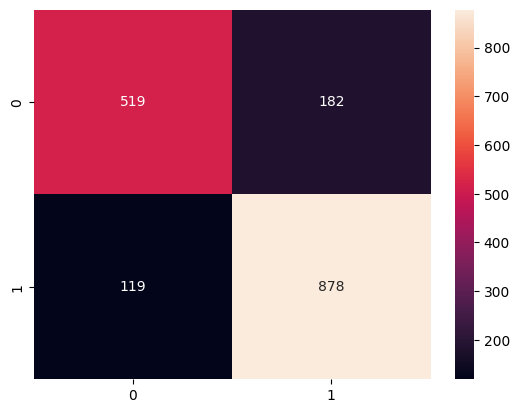

In [4250]:
sns.heatmap(cf_matrix, fmt='d', annot=True)

# PR Curve

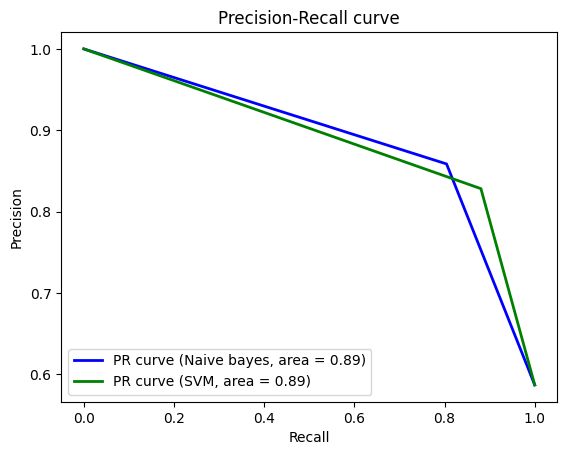

In [4270]:
# Compute precision and recall for the first classifier
precision_1, recall_1, _ = precision_recall_curve(y_test, predictions_NB)
average_precision_1 = auc(recall_1, precision_1)

# Plot Precision-Recall curve for the first classifier
plt.plot(recall_1, precision_1, color='blue', lw=2, label='PR curve (Naive bayes, area = %0.2f)' % average_precision_1)

# Compute precision and recall for the second classifier
precision_2, recall_2, _ = precision_recall_curve(y_test, predictions_SVM)
average_precision_2 = auc(recall_2, precision_2)

# Plot Precision-Recall curve for the second classifier
plt.plot(recall_2, precision_2, color='green', lw=2, label='PR curve (SVM, area = %0.2f)' % average_precision_2)

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

# Show the plot
plt.show()

# ROC Curves

ROC-AUC for Naive Bayes: 0.8080554073060837
ROC-AUC for SVM: 0.8105064122467259


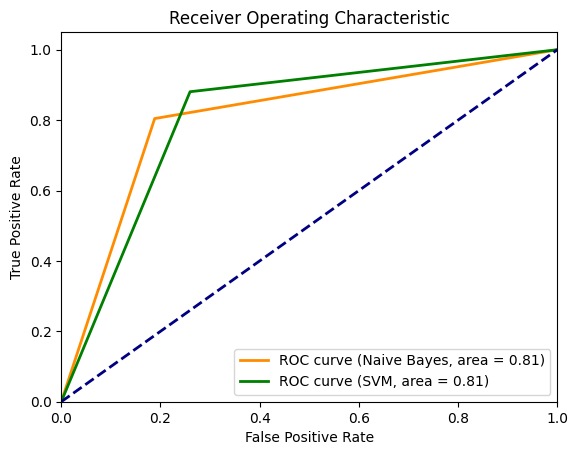

In [4262]:
# Compute ROC-AUC score for the first classifier
roc_auc_NB = roc_auc_score(y_test, predictions_NB)
print("ROC-AUC for Naive Bayes:", roc_auc_NB)

# Compute ROC curve for the first classifier
fpr_NB, tpr_NB, _ = roc_curve(y_test, predictions_NB)
roc_auc_val_NB = auc(fpr_NB, tpr_NB)

# Plot ROC curve for the first classifier
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=2, label='ROC curve (Naive Bayes, area = %0.2f)' % roc_auc_val_NB)

# Compute ROC-AUC score for the second classifier
roc_auc_second = roc_auc_score(y_test, predictions_SVM)
print("ROC-AUC for SVM:", roc_auc_second)

# Compute ROC curve for the second classifier
fpr_second, tpr_second, _ = roc_curve(y_test, predictions_SVM)
roc_auc_val_second = auc(fpr_second, tpr_second)

# Plot ROC curve for the second classifier
plt.plot(fpr_second, tpr_second, color='green', lw=2, label='ROC curve (SVM, area = %0.2f)' % roc_auc_val_second)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()